In [ ]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.shape

(150, 6)

In [ ]:
df.columns.tolist()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [ ]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
df = df.drop('Id', axis = 1)

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")
df = df.drop_duplicates()

Number of duplicated rows: 3


In [ ]:
num_duplicates_rem = df.duplicated().sum()
print(f"Number of duplicated rows after removal: {num_duplicates_rem}")

Number of duplicated rows after removal: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


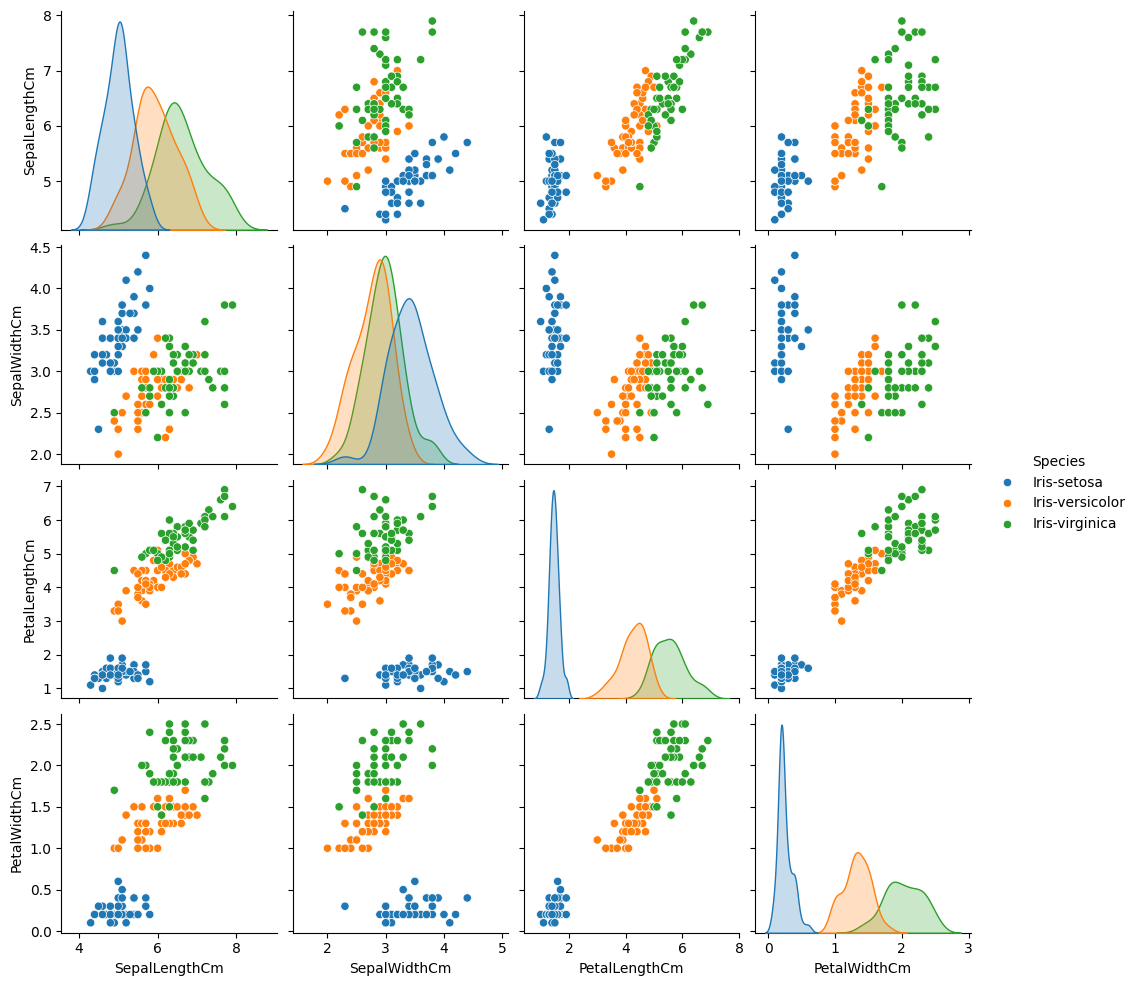

In [ ]:
sns.pairplot(df,hue='Species')

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols=['Species']
le=LabelEncoder()
df[cols]=df[cols].apply(le.fit_transform)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = df.drop('Species', axis = 1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = df['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 147, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
confusion_matrix(y_test,LR_pred)
l=accuracy_score(y_test,LR_pred)
print("LOGISTIC REGRESSION accuracy",l)

0.9333333333333333

In [ ]:
f1_score = f1_score(y_test, LR_pred, average='weighted')
print("F1 Score:", f1_score)
report = classification_report(y_test, LR_pred)
print("Classification Report:\n", report)

F1 Score: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
precision = precision_score(y_test, LR_pred, average='weighted')
recall = recall_score(y_test, LR_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9333333333333333
Recall: 0.9333333333333333


In [ ]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT_pred = DT.predict(X_test)
a=accuracy_score(y_test,DT_pred)
print("DESICION TREE accuracy",a)
report = classification_report(y_test, DT_pred)
print("Classification Report:\n", report)

DESICION TREE accuracy 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
r=accuracy_score(y_test, rfc_pred)
print("RANDOM FOREST accuracy",r)
report = classification_report(y_test, rfc_pred)
print("Classification Report:\n", report)

RANDOM FOREST accuracy 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
k = accuracy_score(y_test,knn_pred)
print("K-MEANS CLASSIFIER accuracy",k)
report = classification_report(y_test, knn_pred)
print("Classification Report:\n", report)

K-MEANS CLASSIFIER accuracy 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

